In [11]:
# import library
import numpy as np
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [36]:
# Black Scholes Model

# Share specific information
r = 0.1
S_0 = 100
sigma = 0.3 # votatility

# Option specific information
K = 110
T = 1
current_time = 0

In [37]:
# Functions for later valuations
def terminal_shareprice(S_0, r, sigma, Z, T):
    """Generates the terminal share price given some random normal values, Z"""
    a = r - sigma**2 / 2
    b = sigma * np.sqrt(T) * Z
    c = np.exp(a * T + b)
    result = S_0 * c
    return result

def discounted_call_payoff(S_T, K, r, T):
    """Function for evaluating the discounted payoff of call in Monte Carlo Estimation"""
    a = np.exp(-r * T)
    b = np.maximum(S_T - K,0)
    result = a * b
    return result 

In [38]:
def d_1_calculate(S_0,K,r,sigma,T):
    """Function for d_1 calculation"""
    a = math.log(S_0/K)
    b = (r + (sigma**2 / 2)) * T
    c = sigma * math.sqrt(T)
    result = (a + b) / c
    return result

def d_2_calculate(d_1,sigma,T):
    a = sigma * math.sqrt(T)
    result = d_1 - a
    return result

In [39]:
## Implement Monte Carlo Algorithm

np.random.seed(0)

mcall_est = [None] * 50
mcall_std = [None] * 50

for i in range(1,51):
    norm_array = norm.rvs(size = 1000 * i)
    term_val = terminal_shareprice(S_0,r,sigma,norm_array,T-current_time)
    mcall_val = discounted_call_payoff(term_val, K, r, T-current_time)
    mcall_est [i - 1] = np.mean(mcall_val)
    mcall_std [i - 1] = np.std(mcall_val)/np.sqrt(i*1000)

In [40]:
def analytic_callprice_calculate(S_0,d_1,d_2,K,r,T):
    a = S_0 * norm.cdf(d_1)
    b = norm.cdf(d_2) * K * math.exp(-r * T)
    result = a - b
    return result

In [41]:
d_1 = d_1_calculate(S_0,K,r,sigma,T)
d_2 = d_2_calculate(d_1,sigma,T)
analytic_callprice = analytic_callprice_calculate(S_0,d_1,d_2,K,r,T)

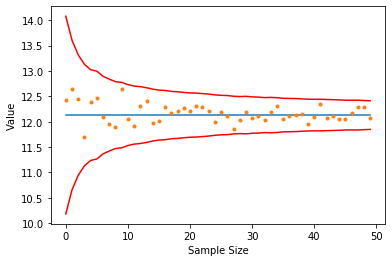

In [42]:
# Plot
plt.plot([analytic_callprice]*50)
plt.plot(mcall_est, '.')
plt.plot(analytic_callprice + np.array(mcall_std)*3, 'r')
plt.plot(analytic_callprice - np.array(mcall_std)*3, 'r')
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.show()